In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from itertools import islice
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
path = '/home/luiz/tcc/TCC-LUIZ/datasets/trajectory_ball_filtered_np.pkl'

In [3]:
# Abrindo o arquivo pkl com os dados
with open(path, 'rb') as f:
    ball = pkl.load(f)

In [4]:
ball.shape

(38917, 4)

In [5]:
ball

array([[ 1.72154765e+09, -2.92506360e+00,  2.85018730e+00,
                    nan],
       [ 1.72154765e+09, -3.56270980e+00,  2.64928840e+00,
                    nan],
       [ 1.72154765e+09, -3.66484430e+00,  3.40293480e+00,
                    nan],
       ...,
       [ 1.72154971e+09, -1.44231590e+03,  1.42002610e+03,
                    nan],
       [ 1.72154971e+09, -1.44536740e+03,  1.42300270e+03,
                    nan],
       [ 1.72154971e+09, -1.44630630e+03,  1.42358890e+03,
                    nan]])

In [80]:
data = ball[0:1000, 1:3]

In [81]:
data

array([[  -2.9250636,    2.8501873],
       [  -3.5627098,    2.6492884],
       [  -3.6648443,    3.4029348],
       ...,
       [2037.9207   , -562.6387   ],
       [2038.6077   , -564.1657   ],
       [2037.6696   , -565.23267  ]])

In [82]:
data = data[~np.isnan(data).any(axis=1)]

In [83]:
def create_dataset(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        end_out_ix = end_ix + n_steps_out

        if end_out_ix > len(data):
            break

        seq_x = data[i:end_ix]
        seq_y = data[end_ix:end_out_ix]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [84]:
# Definindo a janela
n_steps_in = 5  # Usar 4 pontos para prever o próximo
n_steps_out = 1 # Prever 1 ponto

# Gerando o dataset com janelas
X, y = create_dataset(data, n_steps_in, n_steps_out)

In [85]:
X

array([[[  -2.9250636,    2.8501873],
        [  -3.5627098,    2.6492884],
        [  -3.6648443,    3.4029348],
        [  -4.3865337,    3.1626225],
        [  -3.9018857,    2.5838504]],

       [[  -3.5627098,    2.6492884],
        [  -3.6648443,    3.4029348],
        [  -4.3865337,    3.1626225],
        [  -3.9018857,    2.5838504],
        [  -4.276483 ,    2.709127 ]],

       [[  -3.6648443,    3.4029348],
        [  -4.3865337,    3.1626225],
        [  -3.9018857,    2.5838504],
        [  -4.276483 ,    2.709127 ],
        [  -3.3554912,    2.0483112]],

       ...,

       [[2038.4117   , -557.79675  ],
        [2037.476    , -558.74384  ],
        [2037.0106   , -558.69196  ],
        [2037.6984   , -560.7799   ],
        [2038.2692   , -562.09863  ]],

       [[2037.476    , -558.74384  ],
        [2037.0106   , -558.69196  ],
        [2037.6984   , -560.7799   ],
        [2038.2692   , -562.09863  ],
        [2037.9207   , -562.6387   ]],

       [[2037.0106   , -558

In [86]:
y

array([[[-4.2764830e+00,  2.7091270e+00]],

       [[-3.3554912e+00,  2.0483112e+00]],

       [[-4.5808444e+00,  1.7529768e+00]],

       ...,

       [[ 2.0379207e+03, -5.6263870e+02]],

       [[ 2.0386077e+03, -5.6416570e+02]],

       [[ 2.0376696e+03, -5.6523267e+02]]])

In [87]:
print(f"Shape do X: {X.shape}")
print(f"Shape do y: {y.shape}")

Shape do X: (995, 5, 2)
Shape do y: (995, 1, 2)


In [88]:
# Divisão cronológica (70% treino, 20% validação, 10% teste)
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.2)
test_size = len(X) - train_size - val_size

In [89]:
print(f"Tamanho do conjunto de treino: {train_size}")
print(f"Tamanho do conjunto de validação: {val_size}")
print(f"Tamanho do conjunto de teste: {test_size}")

Tamanho do conjunto de treino: 696
Tamanho do conjunto de validação: 199
Tamanho do conjunto de teste: 100


In [90]:
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

In [91]:
print(f"Shape do X_train: {X_train.shape}, Shape do y_train: {y_train.shape}")
print(f"Shape do X_val: {X_val.shape}, Shape do y_val: {y_val.shape}")
print(f"Shape do X_test: {X_test.shape}, Shape do y_test: {y_test.shape}")


Shape do X_train: (696, 5, 2), Shape do y_train: (696, 1, 2)
Shape do X_val: (199, 5, 2), Shape do y_val: (199, 1, 2)
Shape do X_test: (100, 5, 2), Shape do y_test: (100, 1, 2)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
y_train_flat = y_train.reshape(y_train.shape[0], -1)

X_val_flat = X_val.reshape(X_val.shape[0], -1)
y_val_flat = y_val.reshape(y_val.shape[0], -1)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_test_flat = y_test.reshape(y_test.shape[0], -1)

model = LinearRegression()
model.fit(X_train_flat, y_train_flat)

# Avaliação do modelo
train_score = model.score(X_train_flat, y_train_flat)
test_score = model.score(X_test_flat, y_test_flat)

print(f"\nPontuação de Treino: {train_score:.4f}")
print(f"Pontuação de Teste: {test_score:.4f}")


Pontuação de Treino: 0.9995
Pontuação de Teste: 0.9633


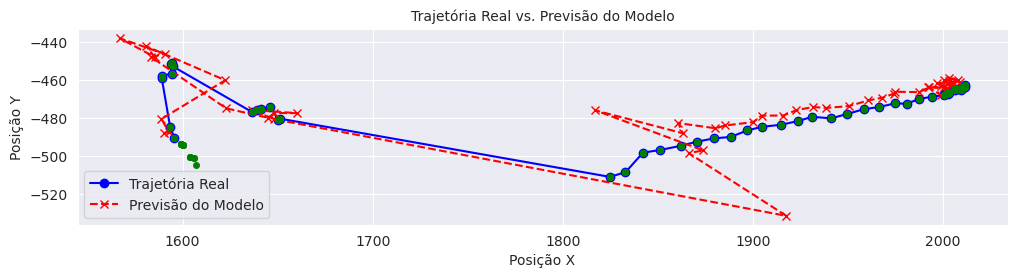

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para um gráfico com um visual mais agradável
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

# Pegar uma porção dos dados de teste para visualização
# Vamos usar os primeiros 20 pontos
num_points_to_plot = 50

# Trajetória real (x e y do y_test)
real_x = y_test_flat[:num_points_to_plot, 0]
real_y = y_test_flat[:num_points_to_plot, 1]

# Previsões do modelo
predictions = model.predict(X_test_flat[:num_points_to_plot])
predicted_x = predictions[:, 0]
predicted_y = predictions[:, 1]

# Plotar a trajetória real
plt.plot(real_x, real_y, 'o-', color='blue', label='Trajetória Real')

# Plotar as previsões do modelo
plt.plot(predicted_x, predicted_y, 'x--', color='red', label='Previsão do Modelo')

# Plotar as janelas de entrada para referência
# Cada janela de entrada tem 4 pontos
for i in range(num_points_to_plot):
    window_x = X_test_flat[i, ::2]  # Coordenadas X da janela de entrada
    window_y = X_test_flat[i, 1::2]  # Coordenadas Y da janela de entrada
    plt.plot(window_x, window_y, 'g.', markersize=8) # Pontos da janela de entrada

# Configurar o gráfico
plt.title('Trajetória Real vs. Previsão do Modelo', fontsize=10)
plt.xlabel('Posição X', fontsize=10)
plt.ylabel('Posição Y', fontsize=10)
plt.legend(fontsize=10)
plt.gca().set_aspect('equal', adjustable='box') # Garantir que o gráfico não fique achatado
plt.show()